# 1. Data Preparation

- images
    - rps-cv-images/paper/0a3UtNzl5Ll3sq8K.png
    - rps-cv-images/rock/0bioBZYFCXqJIulm.png
- width
    - 300 px
- height
    - 200 px
- channel
    - 3
- labels
    - paper
    - rock
    - scissors

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import os
import cv2
#Library pandas digunakan untuk bekerja dengan data dalam format tabular. os adalah library untuk interaksi dengan sistem operasi, yang sering digunakan untuk operasi file seperti pengecekan keberadaan file, pembuatan direktori, dan sebagainya. Sedangkan cv2 (OpenCV) adalah library populer untuk pengolahan gambar dan penglihatan komputer.

In [5]:
# Dataset path
dataset_path = 'CEKBOS'

# Siapkan variabel untuk menampung data-data yang diperlukan
images = []
width = []
height = []
channel = []
label = []

In [7]:
for subfolder in os.listdir(dataset_path):
    # Ini adalah loop pertama yang mengiterasi setiap subfolder di dalam dataset_path. dataset_path adalah jalur direktori tempat gambar-gambar tersebut disimpan. os.listdir(dataset_path) mengembalikan daftar semua file dan subfolder di dalam dataset_path
    subfolder_path = os.path.join(dataset_path, subfolder)
    # Untuk setiap subfolder, jalur lengkapnya digabungkan dengan dataset_path menggunakan os.path.join() sehingga kita mendapatkan jalur lengkap ke subfolder tersebut.

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        image = cv2.imread(image_path)
        
        img_height = image.shape[0]
        img_width = image.shape[1]
        img_channel = image.shape[2]
        
        images.append(image_path)
        width.append(img_width)
        height.append(img_height)
        channel.append(img_channel)
        label.append(subfolder)

In [8]:
# Buat Dictionary untuk menyimpan data yang akan dijadikan tabel / dataframe
data = {
    'image' : images,
    'width' : width,
    'height' : height,
    'channel' : channel,
    'label' : label
}

In [9]:
# Buat dataframe
rps_dataframe = pd.DataFrame(data)
#DataFrame baru dibuat menggunakan pd.DataFrame() dengan data yang telah dikumpulkan sebelumnya. Data ini kemungkinan besar berisi informasi tentang gambar-gambar yang sudah dibaca sebelumnya.
# tampilkan data
rps_dataframe

,image,width,height,channel,label
0,CEKBOS\keluar\IMG_20240305_180707_Burst01.jpg,4080,3060,3,keluar
1,CEKBOS\keluar\IMG_20240305_180707_Burst02.jpg,4080,3060,3,keluar
2,CEKBOS\keluar\IMG_20240305_180707_Burst03.jpg,4080,3060,3,keluar
3,CEKBOS\keluar\IMG_20240305_180707_Burst04.jpg,4080,3060,3,keluar
4,CEKBOS\keluar\IMG_20240305_180707_Burst05.jpg,4080,3060,3,keluar
...,...,...,...,...,...
1359,CEKBOS\masuk\IMG_20240305_180651_Burst16.jpg,4080,3060,3,masuk
1360,CEKBOS\masuk\IMG_20240305_180651_Burst17.jpg,4080,3060,3,masuk
1361,CEKBOS\masuk\IMG_20240305_180651_Burst18.jpg,4080,3060,3,masuk
1362,CEKBOS\masuk\IMG_20240305_180651_Burst19.jpg,4080,3060,3,masuk


# 2. Data Exploration

In [10]:
total_images = len(rps_dataframe)
total_class = rps_dataframe.label.nunique()

print(f"There are {total_images} total images from {total_class} classes.")

There are 1364 total images from 2 classes.


## 2.1. Distribution of Target Class

In [11]:
import matplotlib.pyplot as plt
#ibrary visualisasi data yang paling populer di Python. Ia dapat digunakan untuk membuat berbagai jenis plot, seperti garis, batang, lingkaran, histogram, scatter plot, dan masih banyak lagi. Matplotlib dapat digunakan secara langsung untuk membuat plot sederhana, atau bersamaan dengan library lain seperti Seaborn untuk plot yang lebih kaya fitur.
import seaborn as sns
#Seaborn adalah library visualisasi data statistik yang dibangun di atas Matplotlib. Seaborn menyediakan antarmuka yang lebih tinggi dan mudah digunakan untuk membuat plot yang lebih cantik dan informatif secara cepat. Ia menyediakan fungsi-fungsi yang disesuaikan dengan tipe data statistik tertentu, seperti plot distribusi, regresi, heatmap, pairplot, dan banyak lagi.

<Axes: xlabel='label', ylabel='count'>

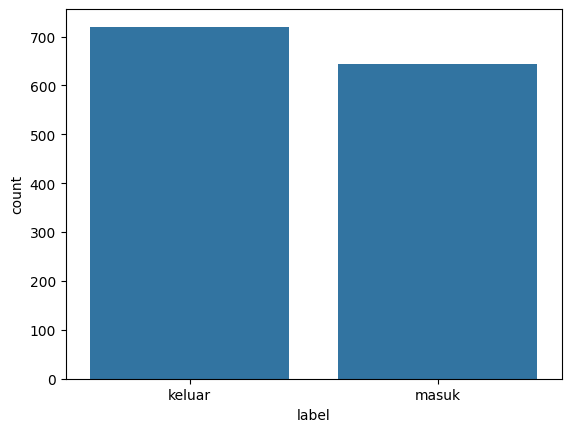

In [12]:
sns.countplot(x = rps_dataframe.label)
#ns.countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap kategori. Argumen x menentukan data yang akan digunakan untuk sumbu x, dalam hal ini, kategori label dari DataFrame rps_dataframe.

## 2.2. Sample Images 

Samples of 'keluar' :


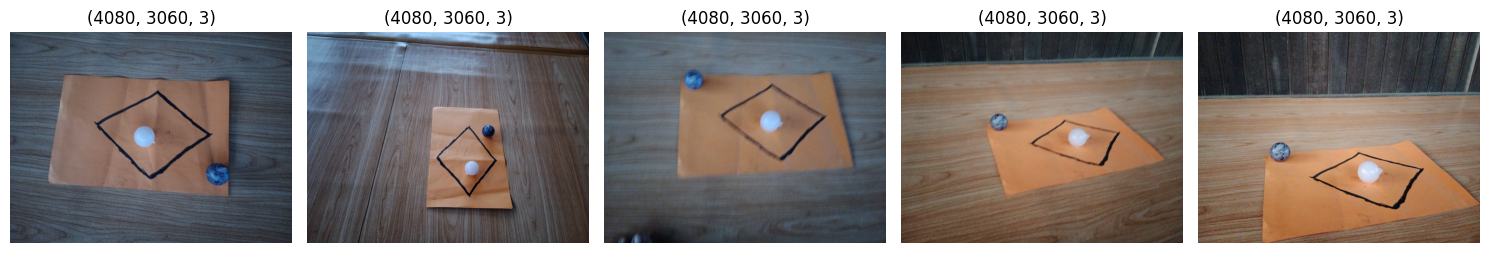

Samples of 'masuk' :


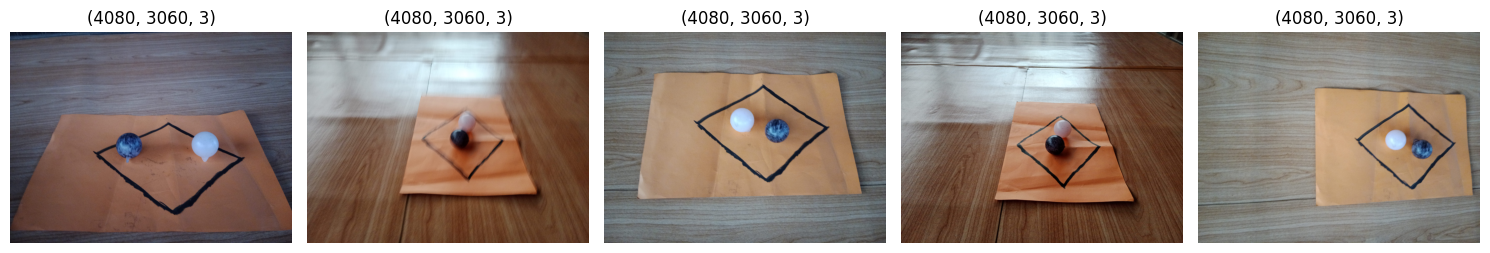

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def display_samples(dataframe, label):
    #display_samples yang bertujuan untuk menampilkan sampel gambar dari setiap kategori label dalam DataFrame rps_dataframe. Fungsi ini menerima dua parameter: DataFrame yang berisi data gambar dan label kategori yang ingin ditampilkan sampelnya.
    print(f"Samples of '{label}' :")

    filtered_dataframe = dataframe[dataframe['label'] == label]
     #dataframe[dataframe['label'] == label] digunakan untuk membuat DataFrame baru (filtered_dataframe) yang hanya berisi baris-baris di mana nilai kolom 'label' sama dengan nilai label yang diberikan sebagai parameter
    samples = random.sample(filtered_dataframe.index.tolist(), 5)
    #etika kita menggunakan .tolist() pada objek indeks DataFrame, itu akan menghasilkan daftar yang berisi semua nilai indeks baris.
    fig, axes = plt.subplots(1, 5, figsize=(15, 6))
    
    for i, index in enumerate(samples):
        
        row = filtered_dataframe.loc[index]
        #loc[], kita dapat mengakses baris berdasarkan label indeksnya. Dalam hal ini, index adalah label indeks dari baris yang ingin diakses.Hasilnya, row akan berisi semua data yang terkait dengan baris terseb
        image_path = row['image']
        #variabel yang menyimpan baris (record) dari dataframe yang sedang diproses. Baris ini berisi nilai untuk setiap kolom dalam dataframe.
        width = row['width']
        height = row['height']
        channel = row['channel']
        #channel mengacu pada jumlah saluran warna dalam gambar. Dalam kasus gambar warna RGB (Red, Green, Blue), biasanya ada tiga saluran: satu untuk masing-masing warna. Jadi, channel dalam konteks ini akan berisi jumlah saluran warna dalam gambar yang sedang diproses. Misalnya, untuk gambar RGB, channel akan bernilai 3, karena ada tiga saluran warna
        img = mpimg.imread(image_path)
        #img = mpimg.imread(image_path) bertanggung jawab untuk membaca gambar dari path file yang telah diambil dari baris data yang sedang diprose
        axes[i].imshow(img)
        #: Ini adalah perintah untuk menampilkan gambar di subplot ke-i dengan menggunakan metode imshow() dari matplotlib. Gambar yang ditampilkan di subplot tersebut adalah gambar yang telah dimuat sebelumnya menggunakan mpimg.imread(image_path).
        axes[i].set_title(f'({width}, {height}, {channel})')
        #axes[i].set_title(f'({width}, {height}, {channel})'): Ini adalah perintah untuk menambahkan judul pada subplot ke-i. Judul tersebut adalah tuple yang berisi informasi tentang lebar (width), tinggi (height), dan jumlah channel (channel) dari gambar yang ditampilkan di subplot tersebut.
        axes[i].axis('off')
        #Ini adalah perintah untuk menyembunyikan sumbu pada subplot ke-i. Dengan menyembunyikan sumbu, maka gambar akan ditampilkan tanpa adanya garis pembatas atau penanda sumbu. Hal ini membuat tampilan gambar menjadi lebih bersih dan fokus pada konten gambar itu sendiri.
    
    plt.tight_layout()
    plt.show()

labels = rps_dataframe['label'].unique()
#digunakan untuk mendapatkan nilai unik dari kolom 'label' dalam dataframe rps_dataframe. Ini akan mengembalikan array atau daftar yang berisi semua nilai unik yang ada dalam kolom 'label'. Dengan kata lain, perintah ini akan memberikan daftar kelas atau kategori yang terdapat dalam dataset. Dalam konteks ini, 'label' mewakili kategori atau kelas gambar yang telah diproses dalam dataframe.

for label in labels:
    display_samples(rps_dataframe, label)

# 3. Data Preprocessing

## 3.1. Splitting Data

- Membagi data menjadi data train, validation, testing

In [14]:
# Import library yang dibutuhkan
from sklearn.model_selection import train_test_split

In [15]:
X = rps_dataframe['image']

X

0       CEKBOS\keluar\IMG_20240305_180707_Burst01.jpg
1       CEKBOS\keluar\IMG_20240305_180707_Burst02.jpg
2       CEKBOS\keluar\IMG_20240305_180707_Burst03.jpg
3       CEKBOS\keluar\IMG_20240305_180707_Burst04.jpg
4       CEKBOS\keluar\IMG_20240305_180707_Burst05.jpg
                            ...                      
1359     CEKBOS\masuk\IMG_20240305_180651_Burst16.jpg
1360     CEKBOS\masuk\IMG_20240305_180651_Burst17.jpg
1361     CEKBOS\masuk\IMG_20240305_180651_Burst18.jpg
1362     CEKBOS\masuk\IMG_20240305_180651_Burst19.jpg
1363     CEKBOS\masuk\IMG_20240305_180651_Burst20.jpg
Name: image, Length: 1364, dtype: object

In [16]:
y = rps_dataframe['label']

y

0       keluar
1       keluar
2       keluar
3       keluar
4       keluar
         ...  
1359     masuk
1360     masuk
1361     masuk
1362     masuk
1363     masuk
Name: label, Length: 1364, dtype: object

In [17]:
y = y[:X.shape[0]]

- Pertama, bagi data menjadi train dan test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.37, 
                                                    random_state = 42)

In [19]:
X_train

442     CEKBOS\keluar\IMG_20240305_181114_Burst03.jpg
1105     CEKBOS\masuk\IMG_20240305_180258_Burst10.jpg
319     CEKBOS\keluar\IMG_20240305_180928_Burst20.jpg
859      CEKBOS\masuk\IMG_20240305_180200_Burst04.jpg
940      CEKBOS\masuk\IMG_20240305_180221_Burst05.jpg
                            ...                      
1095     CEKBOS\masuk\IMG_20240305_180253_Burst20.jpg
1130     CEKBOS\masuk\IMG_20240305_180313_Burst15.jpg
1294     CEKBOS\masuk\IMG_20240305_180609_Burst19.jpg
860      CEKBOS\masuk\IMG_20240305_180200_Burst05.jpg
1126     CEKBOS\masuk\IMG_20240305_180313_Burst11.jpg
Name: image, Length: 859, dtype: object

In [20]:
X_test

428     CEKBOS\keluar\IMG_20240305_181109_Burst09.jpg
930      CEKBOS\masuk\IMG_20240305_180216_Burst15.jpg
781      CEKBOS\masuk\IMG_20240305_180106_Burst02.jpg
451     CEKBOS\keluar\IMG_20240305_181114_Burst12.jpg
429     CEKBOS\keluar\IMG_20240305_181109_Burst10.jpg
                            ...                      
626     CEKBOS\keluar\IMG_20240305_181202_Burst07.jpg
453     CEKBOS\keluar\IMG_20240305_181114_Burst14.jpg
1024     CEKBOS\masuk\IMG_20240305_180239_Burst09.jpg
314     CEKBOS\keluar\IMG_20240305_180928_Burst15.jpg
439     CEKBOS\keluar\IMG_20240305_181109_Burst20.jpg
Name: image, Length: 505, dtype: object

In [21]:
y_train

442     keluar
1105     masuk
319     keluar
859      masuk
940      masuk
         ...  
1095     masuk
1130     masuk
1294     masuk
860      masuk
1126     masuk
Name: label, Length: 859, dtype: object

In [22]:
y_test

428     keluar
930      masuk
781      masuk
451     keluar
429     keluar
         ...  
626     keluar
453     keluar
1024     masuk
314     keluar
439     keluar
Name: label, Length: 505, dtype: object

- Selanjutnya, dari data train bagi menjadi train dan validation

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                    test_size = 0.37, 
                                                    random_state = 42)

In [24]:
X_train

150     CEKBOS\keluar\IMG_20240305_180839_Burst11.jpg
688     CEKBOS\keluar\IMG_20240305_181214_Burst09.jpg
674     CEKBOS\keluar\IMG_20240305_181210_Burst15.jpg
804      CEKBOS\masuk\IMG_20240305_180115_Burst05.jpg
1244     CEKBOS\masuk\IMG_20240305_180559_Burst09.jpg
                            ...                      
716     CEKBOS\keluar\IMG_20240305_181218_Burst17.jpg
618     CEKBOS\keluar\IMG_20240305_181157_Burst19.jpg
326     CEKBOS\keluar\IMG_20240305_180932_Burst07.jpg
179     CEKBOS\keluar\IMG_20240305_180843_Burst20.jpg
80      CEKBOS\keluar\IMG_20240305_180818_Burst01.jpg
Name: image, Length: 541, dtype: object

In [25]:
X_val

1183     CEKBOS\masuk\IMG_20240305_180329_Burst08.jpg
37      CEKBOS\keluar\IMG_20240305_180713_Burst18.jpg
1217     CEKBOS\masuk\IMG_20240305_180545_Burst02.jpg
258     CEKBOS\keluar\IMG_20240305_180914_Burst19.jpg
616     CEKBOS\keluar\IMG_20240305_181157_Burst17.jpg
                            ...                      
921      CEKBOS\masuk\IMG_20240305_180216_Burst06.jpg
1210     CEKBOS\masuk\IMG_20240305_180538_Burst15.jpg
1073     CEKBOS\masuk\IMG_20240305_180249_Burst18.jpg
872      CEKBOS\masuk\IMG_20240305_180200_Burst17.jpg
1267     CEKBOS\masuk\IMG_20240305_180604_Burst12.jpg
Name: image, Length: 318, dtype: object

- Sebelum melakukan augmentasi gambar, pastikan satukan variabel x dan y menjadi satu kesatuan di dalam dataframe

In [26]:
df_train = pd.DataFrame({
    'image' : X_train,
    'label' : y_train
})

df_val = pd.DataFrame({
    'image' : X_val,
    'label' : y_val
})

df_test = pd.DataFrame({
    'image' : X_test,
    'label' : y_test
})

In [27]:
df_train

,image,label
150,CEKBOS\keluar\IMG_20240305_180839_Burst11.jpg,keluar
688,CEKBOS\keluar\IMG_20240305_181214_Burst09.jpg,keluar
674,CEKBOS\keluar\IMG_20240305_181210_Burst15.jpg,keluar
804,CEKBOS\masuk\IMG_20240305_180115_Burst05.jpg,masuk
1244,CEKBOS\masuk\IMG_20240305_180559_Burst09.jpg,masuk
...,...,...
716,CEKBOS\keluar\IMG_20240305_181218_Burst17.jpg,keluar
618,CEKBOS\keluar\IMG_20240305_181157_Burst19.jpg,keluar
326,CEKBOS\keluar\IMG_20240305_180932_Burst07.jpg,keluar
179,CEKBOS\keluar\IMG_20240305_180843_Burst20.jpg,keluar


In [28]:
df_val

,image,label
1183,CEKBOS\masuk\IMG_20240305_180329_Burst08.jpg,masuk
37,CEKBOS\keluar\IMG_20240305_180713_Burst18.jpg,keluar
1217,CEKBOS\masuk\IMG_20240305_180545_Burst02.jpg,masuk
258,CEKBOS\keluar\IMG_20240305_180914_Burst19.jpg,keluar
616,CEKBOS\keluar\IMG_20240305_181157_Burst17.jpg,keluar
...,...,...
921,CEKBOS\masuk\IMG_20240305_180216_Burst06.jpg,masuk
1210,CEKBOS\masuk\IMG_20240305_180538_Burst15.jpg,masuk
1073,CEKBOS\masuk\IMG_20240305_180249_Burst18.jpg,masuk
872,CEKBOS\masuk\IMG_20240305_180200_Burst17.jpg,masuk


In [29]:
df_test

,image,label
428,CEKBOS\keluar\IMG_20240305_181109_Burst09.jpg,keluar
930,CEKBOS\masuk\IMG_20240305_180216_Burst15.jpg,masuk
781,CEKBOS\masuk\IMG_20240305_180106_Burst02.jpg,masuk
451,CEKBOS\keluar\IMG_20240305_181114_Burst12.jpg,keluar
429,CEKBOS\keluar\IMG_20240305_181109_Burst10.jpg,keluar
...,...,...
626,CEKBOS\keluar\IMG_20240305_181202_Burst07.jpg,keluar
453,CEKBOS\keluar\IMG_20240305_181114_Burst14.jpg,keluar
1024,CEKBOS\masuk\IMG_20240305_180239_Burst09.jpg,masuk
314,CEKBOS\keluar\IMG_20240305_180928_Burst15.jpg,keluar


## 3.2. Image Augmentation

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Persiapkan generator untuk meng-generate gambar-gambar dengan berbagai macam perspektif.

In [32]:
# Generator untuk data train
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 45,
    horizontal_flip = True,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2
)

# Generator untuk data validation
val_datagen = ImageDataGenerator(
    rescale = 1/255
)

# Generator untuk data testing
test_datagen = ImageDataGenerator(
    rescale = 1/255
)

- Selanjutnya, aplikasikan generator yang telah dibuat ke data yang kita punya

In [33]:
train = train_datagen.flow_from_dataframe(
    df_train,
    x_col = 'image',
    y_col = 'label',
    target_size = (224, 224),
    batch_size = 8,
    class_mode = 'categorical',
    color_mode = 'rgb',
    #RGB dan satu laagi lupa 
    shuffle = True
)

val = val_datagen.flow_from_dataframe(
    df_val,
    x_col = 'image',
    y_col = 'label',
    target_size = (224, 224),
    batch_size = 8,
    color_mode = 'rgb',
    shuffle = True
)

test = test_datagen.flow_from_dataframe(
    df_test,
    x_col = 'image',
    y_col = 'label',
    target_size =(224, 224),
    batch_size = 8,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle = True
)

Found 541 validated image filenames belonging to 2 classes.
Found 318 validated image filenames belonging to 2 classes.
Found 505 validated image filenames belonging to 2 classes.


In [34]:
train.class_indices

{'keluar': 0, 'masuk': 1}

In [35]:
val.class_indices

{'keluar': 0, 'masuk': 1}

In [36]:
test.class_indices

{'keluar': 0, 'masuk': 1}

# 4. Modeling

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

## 4.1. Create CNN Architecture

In [38]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3))) # Convolutional layer
model.add(MaxPool2D(pool_size=(2, 2))) # Pooling layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # Convolutional layer
model.add(MaxPool2D(pool_size=(2, 2))) # Pooling layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # Convolutional layer
model.add(MaxPool2D(pool_size=(2, 2))) # Pooling layer
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu')) # Convolutional layer
model.add(MaxPool2D(pool_size=(2, 2))) # Pooling layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) # Change the number of units to 2 and activation to 'softmax'


d:\DLOK\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## 4.2. Model Compiling

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [40]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,264,322 (73.49 MB)

 Trainable params: 19,264,322 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

## 4.3. Model Training

In [42]:
learning_history = model.fit(train, 
                             validation_data = val,
                             epochs = 5)

Epoch 1/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 65s 911ms/step - accuracy: 0.5466 - loss: 0.6854 - val_accuracy: 0.5189 - val_loss: 0.7828
Epoch 2/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 64s 898ms/step - accuracy: 0.6412 - loss: 0.6040 - val_accuracy: 0.8113 - val_loss: 0.3504
Epoch 3/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 61s 864ms/step - accuracy: 0.8062 - loss: 0.4153 - val_accuracy: 0.9560 - val_loss: 0.2719
Epoch 4/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 61s 850ms/step - accuracy: 0.8054 - loss: 0.4426 - val_accuracy: 0.6604 - val_loss: 0.6028
Epoch 5/5
68/68 ━━━━━━━━━━━━━━━━━━━━ 60s 847ms/step - accuracy: 0.8349 - loss: 0.3927 - val_accuracy: 0.7421 - val_loss: 0.4852


<function matplotlib.pyplot.show(close=None, block=None)>

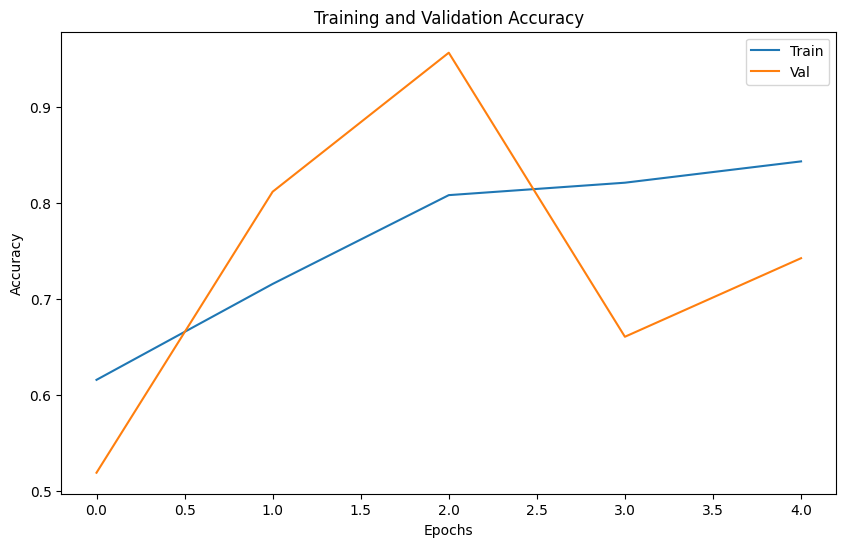

In [43]:
plt.figure(figsize=(10,6))
plt.plot(learning_history.history['accuracy'])
plt.plot(learning_history.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Val'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

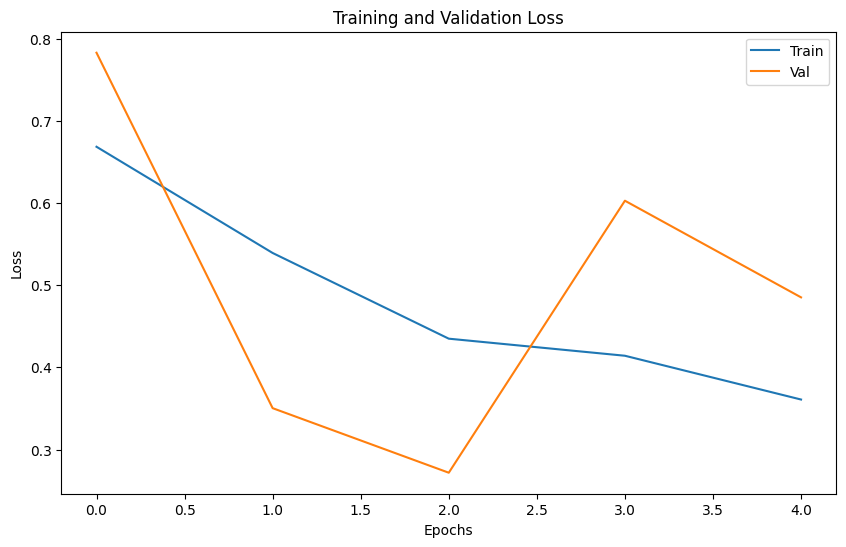

In [44]:
plt.figure(figsize=(10,6))
plt.plot(learning_history.history['loss'])
plt.plot(learning_history.history['val_loss'])
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Val'])
plt.show

## 4.3. Model Evaluation

In [48]:
model.evaluate(train)

68/68 ━━━━━━━━━━━━━━━━━━━━ 30s 434ms/step - accuracy: 0.8577 - loss: 0.2890


[0.3010736107826233, 0.8576709628105164]

## 4.4. Save Model

In [49]:
model.save('rps_classification.keras')

# 5. Prediction

In [50]:
import cv2
import numpy as np

In [54]:
image = cv2.imread('keluar.jpg')
image = cv2.imread('masuk.jpg')

image.shape

(3060, 4080, 3)

- Sesuaikan kriteria dari gambar dengan inputan model

In [59]:
# Merubah ukuran gambar
image = cv2.resize(image, (224, 224))
image.shape

(224, 224, 3)

In [60]:
image

array([[[ 77,  76,  80],
        [ 73,  76,  81],
        [ 72,  74,  84],
        ...,
        [126, 116, 116],
        [128, 118, 118],
        [120, 109, 111]],

       [[ 84,  83,  87],
        [ 88,  89,  93],
        [ 90,  91,  95],
        ...,
        [125, 117, 117],
        [116, 111, 110],
        [120, 116, 115]],

       [[ 86,  87,  88],
        [ 68,  69,  73],
        [ 81,  79,  86],
        ...,
        [115, 111, 110],
        [109, 104, 105],
        [102, 102, 102]],

       ...,

       [[ 67,  63,  64],
        [ 53,  48,  49],
        [ 79,  77,  76],
        ...,
        [ 79,  71,  64],
        [ 67,  58,  54],
        [ 71,  63,  63]],

       [[ 68,  63,  64],
        [ 59,  54,  55],
        [ 70,  68,  67],
        ...,
        [ 75,  67,  60],
        [ 69,  60,  56],
        [ 73,  68,  67]],

       [[ 47,  50,  54],
        [ 41,  43,  44],
        [ 50,  55,  58],
        ...,
        [ 66,  56,  49],
        [ 78,  66,  60],
        [ 53,  50,  46]]

In [61]:
# Scaling nilai-nilai pixel pada gambar menjadi angka dengan rentang 0-1
image = image / 255
image

array([[[0.30196078, 0.29803922, 0.31372549],
        [0.28627451, 0.29803922, 0.31764706],
        [0.28235294, 0.29019608, 0.32941176],
        ...,
        [0.49411765, 0.45490196, 0.45490196],
        [0.50196078, 0.4627451 , 0.4627451 ],
        [0.47058824, 0.42745098, 0.43529412]],

       [[0.32941176, 0.3254902 , 0.34117647],
        [0.34509804, 0.34901961, 0.36470588],
        [0.35294118, 0.35686275, 0.37254902],
        ...,
        [0.49019608, 0.45882353, 0.45882353],
        [0.45490196, 0.43529412, 0.43137255],
        [0.47058824, 0.45490196, 0.45098039]],

       [[0.3372549 , 0.34117647, 0.34509804],
        [0.26666667, 0.27058824, 0.28627451],
        [0.31764706, 0.30980392, 0.3372549 ],
        ...,
        [0.45098039, 0.43529412, 0.43137255],
        [0.42745098, 0.40784314, 0.41176471],
        [0.4       , 0.4       , 0.4       ]],

       ...,

       [[0.2627451 , 0.24705882, 0.25098039],
        [0.20784314, 0.18823529, 0.19215686],
        [0.30980392, 0

In [62]:
image = np.expand_dims(image, axis = 0)
image

array([[[[0.30196078, 0.29803922, 0.31372549],
         [0.28627451, 0.29803922, 0.31764706],
         [0.28235294, 0.29019608, 0.32941176],
         ...,
         [0.49411765, 0.45490196, 0.45490196],
         [0.50196078, 0.4627451 , 0.4627451 ],
         [0.47058824, 0.42745098, 0.43529412]],

        [[0.32941176, 0.3254902 , 0.34117647],
         [0.34509804, 0.34901961, 0.36470588],
         [0.35294118, 0.35686275, 0.37254902],
         ...,
         [0.49019608, 0.45882353, 0.45882353],
         [0.45490196, 0.43529412, 0.43137255],
         [0.47058824, 0.45490196, 0.45098039]],

        [[0.3372549 , 0.34117647, 0.34509804],
         [0.26666667, 0.27058824, 0.28627451],
         [0.31764706, 0.30980392, 0.3372549 ],
         ...,
         [0.45098039, 0.43529412, 0.43137255],
         [0.42745098, 0.40784314, 0.41176471],
         [0.4       , 0.4       , 0.4       ]],

        ...,

        [[0.2627451 , 0.24705882, 0.25098039],
         [0.20784314, 0.18823529, 0.19215686]

In [63]:
image.shape

(1, 224, 224, 3)

- Setelah semuanya sesuai dengan kriteria dari model, selanjutnya kita lakukan prediksi

In [64]:
from keras.models import load_model
# Load model

model = load_model('rps_classification.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,792,968 (220.46 MB)

 Trainable params: 19,264,322 (73.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,528,646 (146.98 MB)

- Acuan melihat hasil prediksi :
    - {'paper': 0, 'rock': 1, 'scissors': 2}

In [90]:
prediction = model.predict(image)
print(prediction)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_4_1/Cast:0", shape=(1, 3060, 4080), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (1, 3060, 4080)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 3060, 4080), dtype=uint8)
  • training=False
  • mask=None

In [91]:
prob_keluar = prediction[0][0]
prob_masuk  = prediction[0][1]


In [92]:
print(f"Probability of paper : {prob_keluar}")
print(f"Probability of paper : {prob_masuk}")


Probability of paper : 0.09967959672212601
Probability of paper : 0.9003204703330994
